In [25]:
# imports
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# getting current working directory
os.getcwd()

'/kaggle/working'

In [6]:
# load the data
df = pd.read_csv('/kaggle/input/canada-per-capita-income-prediction/Canada_per_capita_income (1).csv')
df.head()

,year,income
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [9]:
# to find shape of the dataframe
df.shape

(47, 2)

In [11]:
# describe data
df.describe()

,year,income
count,47.000000,47.000000
mean,1993.000000,18920.137063
std,13.711309,12034.679438
min,1970.000000,3399.299037
25%,1981.500000,9526.914515
50%,1993.000000,16426.725480
75%,2004.500000,27458.601420
max,2016.000000,42676.468370


In [15]:
# check for columns
df.columns

Index(['year', 'income'], dtype='object')

In [18]:
# check datatypes
df.dtypes

year        int64
income    float64
dtype: object

**2. Data Preparation**

In [20]:
# to check for null values
df.isna().sum()

year      0
income    0
dtype: int64

In [21]:
# is there any duplicate rows
df.loc[df.duplicated(subset=['year'])].head(5)

,year,income


**3. Feature Understanding**

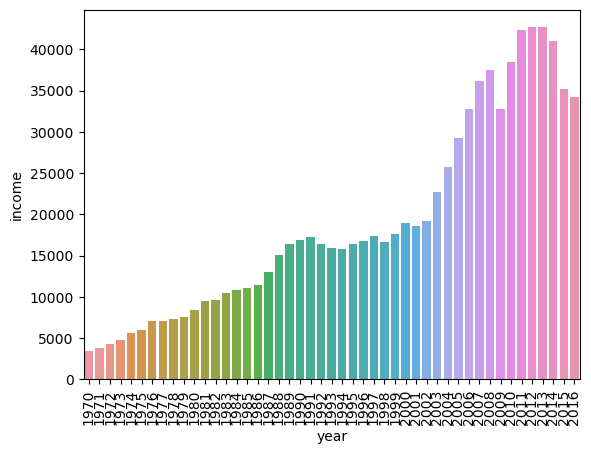

In [35]:
sns.barplot(x=df['year'],y=df['income'])
plt.xticks(rotation=90)
plt.show()

Text(0.5, 0, 'income')

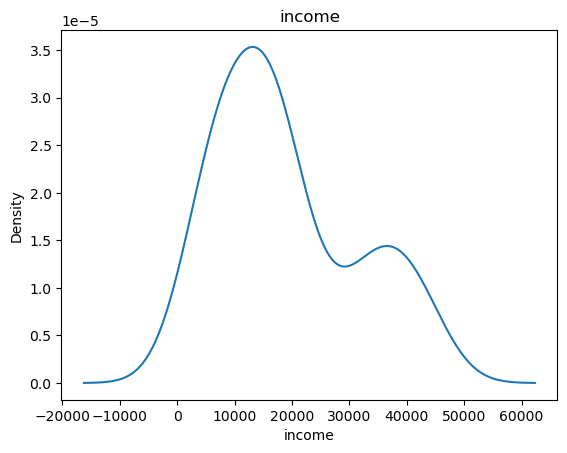

In [37]:
ax = df['income'].plot(kind='kde',
                          title='income')
ax.set_xlabel('income')

**4. Feature Relationships**

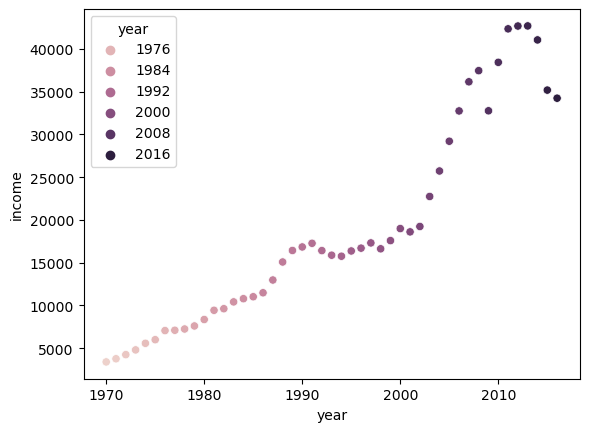

In [39]:
# scatterplot
sns.scatterplot(x=df['year'], y=df['income'],hue=df['year'])
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


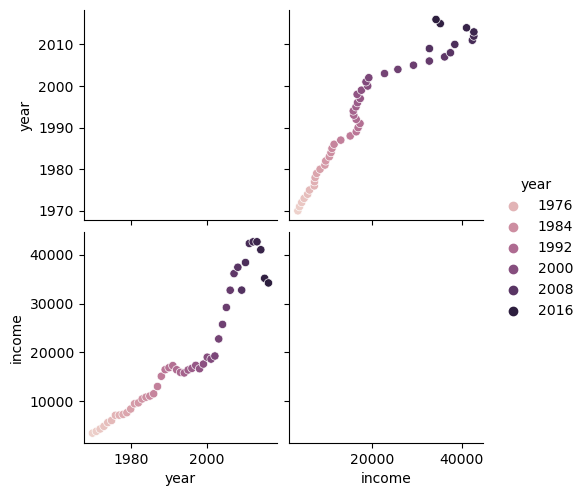

In [41]:
sns.pairplot(df,vars=['year','income'],hue='year')
plt.show()

In [42]:
df_corr = df[['year','income']].dropna().corr()
df_corr

,year,income
year,1.000000,0.943884
income,0.943884,1.000000


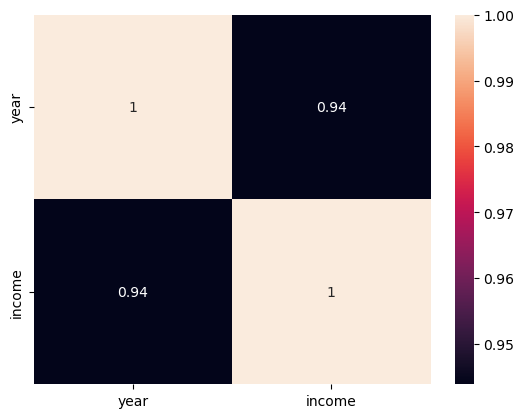

In [44]:
sns.heatmap(df_corr, annot=True)
plt.show()

**Step 5: Ask a Question about the data**
### **What is the maximum difference between two years?**

In [ ]:
ax = df.query('Location != "Other"') \
    .groupby('Location')['Speed_mph'] \
    .agg(['mean','count']) \
    .query('count >= 10') \
    .sort_values('mean')['mean'] \
    .plot(kind='barh', figsize=(12, 5), title='Average Coast Speed by Location')
ax.set_xlabel('Average Coaster Speed')
plt.show()

In [45]:
# Calculate the differences between consecutive years
df['income_diff'] = df['income'].diff()

In [46]:
# Find the maximum difference and corresponding years
max_diff_row = df[df['income_diff'] == df['income_diff'].max()]

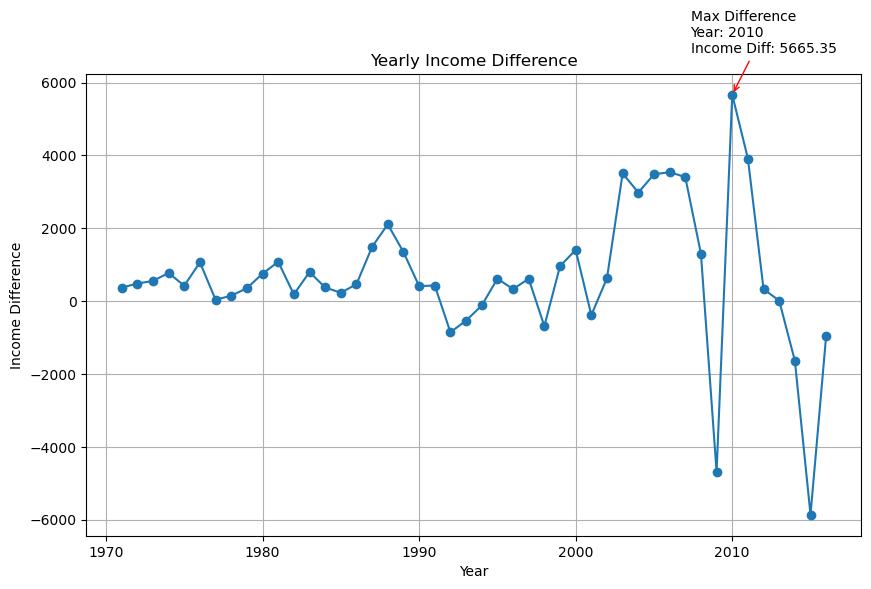

In [49]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df['year'], df['income_diff'], marker='o')
plt.title('Yearly Income Difference')
plt.xlabel('Year')
plt.ylabel('Income Difference')
plt.grid(True)
# Annotate the maximum difference point
plt.annotate(f'Max Difference\nYear: {max_diff_row["year"].values[0]}\nIncome Diff: {max_diff_row["income_diff"].values[0]:.2f}',
             xy=(max_diff_row['year'], max_diff_row['income_diff']),
             xytext=(-30, 30), textcoords='offset points',
             arrowprops=dict(arrowstyle='->', color='red'))

plt.show()